<h2 align=center> Classify Radio Signals from Outer Space with Keras</h2>

![](Allen_Telescope.jpg)
[Allen Telescope Array](https://flickr.com/photos/93452909@N00/5656086917) by [brewbooks](https://www.flickr.com/people/93452909@N00) is licensed under [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)

## Task 1: Import Libraries

In [2]:
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.1.0


## Task 2: Load and Preprocess SETI Data

In [10]:
train_images = pd.read_csv('dataset/train/images.csv',header=None)
train_labels = pd.read_csv('dataset/train/labels.csv',header=None)

val_images = pd.read_csv('dataset/validation/images.csv',header=None)
val_labels = pd.read_csv('dataset/validation/labels.csv',header=None)


In [13]:
train_images.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510


In [12]:
train_labels.head(3)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0


In [19]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape,val_labels.shape)

Training set shape: (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


In [24]:
x_train =train_images.values.reshape(3200,64,128,1)
x_val = val_images.values.reshape(800,64,128,1)

y_train = train_labels.values
y_val = val_labels.values

## Task 3: Plot 2D Spectrograms

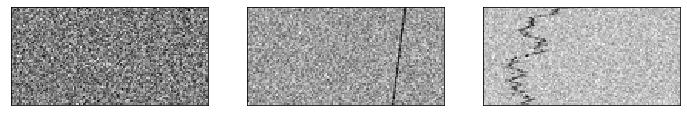

In [34]:
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

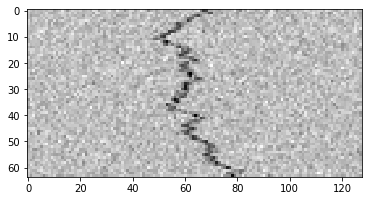

In [32]:
plt.imshow(np.squeeze(x_train[3]), cmap='gray')

## Task 4: Create Training and Validation Data Generators

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_val)

## Task 5: Creating the CNN Model

In [47]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [73]:
# Initialising the CNN
model = Sequential()
# 1st Convolution
model.add(Conv2D(32, (5,5), padding='same',input_shape=(64, 128, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
          
model.add(Dense(4,activation='softmax'))


## Task 6: Learning Rate Scheduling and Compile the Model

In [75]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=5,
    decay_rate =0.96,
    staircase=True
)
optimizer = Adam(learning_rate =lr_schedule)

In [76]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 128, 32)       128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 64, 64)       

## Task 7: Training the Model

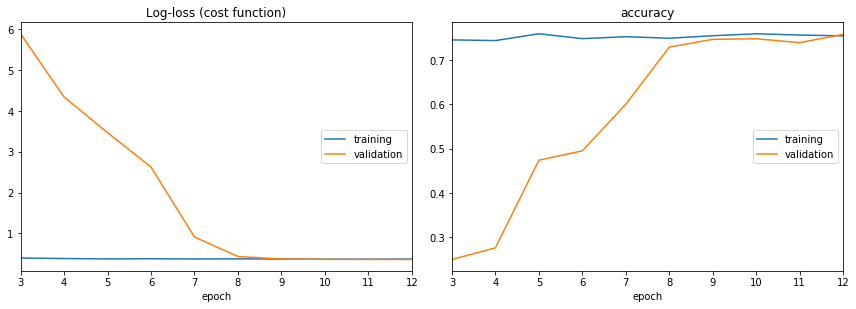

Log-loss (cost function):
training   (min:    0.368, max:    0.704, cur:    0.373)
validation (min:    0.360, max:    6.092, cur:    0.360)

accuracy:
training   (min:    0.693, max:    0.759, cur:    0.754)
validation (min:    0.250, max:    0.757, cur:    0.757)
100/100 [==============================] - 8s 83ms/step - loss: 0.3725 - accuracy: 0.7541 - val_loss: 0.3604 - val_accuracy: 0.7575


In [79]:
checkpoint = ModelCheckpoint('model_weight.h5', monitor= 'val_loss',
                            save_weights_only=True, mode='min', verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]

batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch = len(x_train) // batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val) // batch_size,
    epochs=12,
    callbacks=callbacks
)


## Task 8: Model Evaluation

In [80]:
model.evaluate(x_val, y_val)

800/800 [==============================] - 1s 668us/sample - loss: 0.3609 - accuracy: 0.7538


[0.3609230514086084, 0.75375]

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns


y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.51      0.77      0.61       200
           2       0.52      0.26      0.34       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.76      0.75      0.74       800
weighted avg       0.76      0.75      0.74       800



In [82]:
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

Classification accuracy: 0.753750


In [64]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
